In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from datetime import datetime
#sns.set_style('darkgrid', {'axes.facecolor': '.9'})
#sns.set_palette(palette='deep')
#sns_c = sns.color_palette(palette='deep')
%matplotlib inline

In [2]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#df1=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/nyiso/nyiso_nyc_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)
#df1=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/caiso/la_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)
df1=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/spp/spp_kck_daily_all_features_selected.csv', parse_dates=['date'],date_parser=dateparse)
df2=pd.read_csv('D:/Second_paper_data/COVID-EMDA-master/data_release/spp/kck_test_data_covid_42day_forecast.csv', parse_dates=['date'])

In [3]:
df11=df1[['date','total_load']]
df11['prediction']=df11['total_load']
df11 = df11[(df11['date'] >= '2019-01-01') & (df11['date'] < '2020-12-01')]
df22=df2[['date','total_load','prediction']]
df3=pd.concat([df11,df22],ignore_index=True)

D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 1.0, 'Kansas City')]

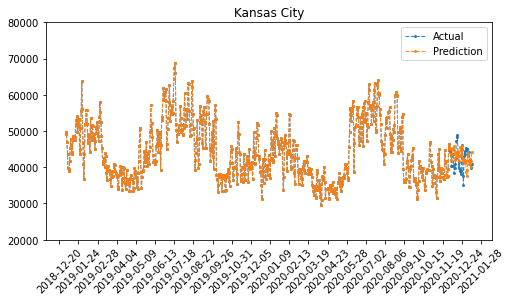

In [8]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df3['date'], df3['total_load'],label='Actual',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.plot(df3['date'], df3['prediction'],label='Prediction',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=35))
#ax.axvline(threshold_date, color=sns_c[3], linestyle='--', label='train test split')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_ylim(20000,80000)
ax.legend(loc='best')
ax.set(title='Kansas City')

In [9]:
df4 = df3[(df3['date'] >= '2020-12-01') & (df3['date'] <= '2021-01-11')]

[Text(0.5, 1.0, 'Kansas City')]

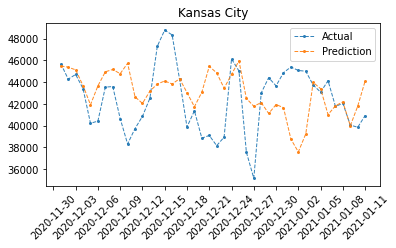

In [11]:
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(df4['date'], df4['total_load'],label='Actual',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.plot(df4['date'], df4['prediction'],label='Prediction',lw=1,alpha=0.9,linestyle='dashed',marker='o',markersize=2)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
#ax.axvline(threshold_date, color=sns_c[3], linestyle='--', label='train test split')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
#ax.set_ylim(60000,140000)
ax.legend(loc='best')
ax.set(title='Kansas City')